<a href="https://colab.research.google.com/github/ansariwaleed/zero-to-mastery-with-tensorflow/blob/main/02_neural_network_classification_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#02 neural network classiication

Okay, we've seen how to deal with a regression problem in TensorFlow, let's look at how we can approach a classification problem.

A classification problem involves predicting whether something is one thing or another.

For example, you might want to:

Predict whether or not someone has heart disease based on their health parameters. This is called binary classification since there are only two options.
Decide whether a photo of is of food, a person or a dog. This is called multi-class classification since there are more than two options.
Predict what categories should be assigned to a Wikipedia article. This is called multi-label classification since a single article could have more than one category assigned.

In [1]:
import tensorflow as tf
print(tf.__version__)

import datetime
print(datetime.datetime.now())

2.15.0
2024-07-02 09:43:58.874731


#creating data to view and fit


In [2]:
from sklearn.datasets import make_circles

#make 1000 exaples
n_samples = 1000

#create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [3]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
#see first 10 labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [5]:
#Make dataframe of features and labels
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles.head(10)

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [6]:
#check out the different labels
circles.label.value_counts()

label
1    500
0    500
Name: count, dtype: int64

look like a binary class

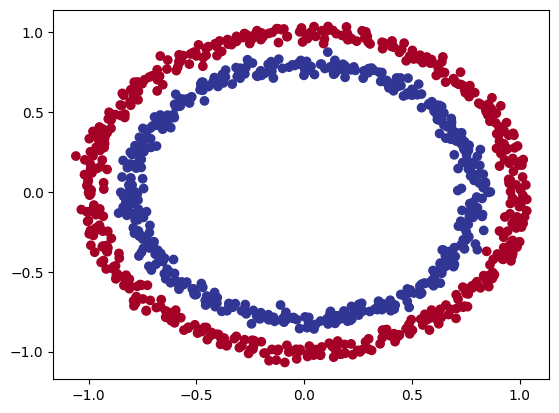

In [7]:
#visualize with the plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

##input and output shapes

One of the most common issues you'll run into when building neural networks is shape mismatches.

More specifically, the shape of the input data and the shape of the output data.

In our case, we want to input X and get our model to predict y.

So let's check out the shapes of X and y.

In [8]:
# check the shape of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [9]:
len(X), len(y)

(1000, 1000)

In [10]:
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

#steps in modelling

In [11]:
#set random seed
tf.random.set_seed(42)

#1. create the model using the seqential API
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

#2. compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), #binary since we are working with 2 class
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

#3. fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 3s 17ms/step - loss: 6.3004 - accuracy: 0.4830
Epoch 2/5
32/32 [==============================] - 0s 15ms/step - loss: 5.2763 - accuracy: 0.4560
Epoch 3/5
32/32 [==============================] - 0s 9ms/step - loss: 5.1382 - accuracy: 0.4580
Epoch 4/5
32/32 [==============================] - 0s 9ms/step - loss: 4.6813 - accuracy: 0.4630
Epoch 5/5
32/32 [==============================] - 1s 19ms/step - loss: 2.8663 - accuracy: 0.4900


In [12]:
#tarin our model for longer
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

In [13]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

model_2.fit(X, y, epochs=100, verbose=0)

In [14]:
#evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 6.9842 - accuracy: 0.5420


[6.984151363372803, 0.5419999957084656]

still low accuracy

In [15]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_3.fit(X, y, epochs=100, verbose=0)

In [16]:
#evaluate
model_3.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6992 - accuracy: 0.5040


[0.6991695165634155, 0.5040000081062317]

In [17]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_3.fit(X, y, epochs=200, verbose=0)

In [18]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 1ms/step
doing binary classifcation...


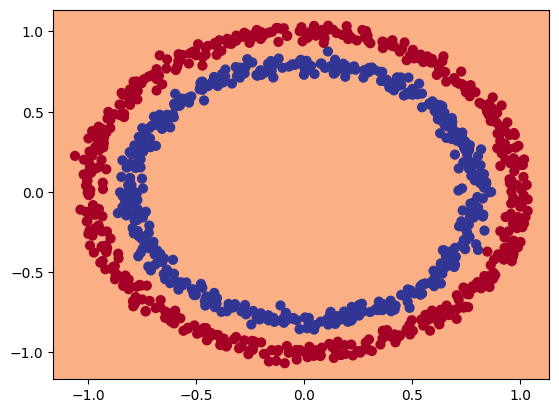

In [19]:
# Check out the predictions our model is making
plot_decision_boundary(model_3, X, y)

In [20]:
# Set random seed
tf.random.set_seed(42)

# Create some regression data
X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

# Split it into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the data
# Note: Before TensorFlow 2.7.0, this line would work
# model_3.fit(X_reg_train, y_reg_train, epochs=100)

# After TensorFlow 2.7.0, see here for more: https://github.com/mrdbourke/tensorflow-deep-learning/discussions/278
model_3.fit(tf.expand_dims(X_reg_train, axis=-1),
            y_reg_train,
            epochs=100)

Epoch 1/100


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 280, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_3' (type Sequential).
    
    Input 0 of layer "dense_6" is incompatible with the layer: expected axis -1 of input shape to have value 2, but received input with shape (None, 1)
    
    Call arguments received by layer 'sequential_3' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 1), dtype=int64)
      • training=True
      • mask=None


In [22]:
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100)               300       
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1321 (5.16 KB)
Trainable params: 1321 (5.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
# Setup random seed
tf.random.set_seed(42)

# Recreate the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Change the loss and metrics of our compiled model
model_3.compile(loss=tf.keras.losses.mae, # change the loss function to be regression-specific
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae']) # change the metric to be regression-specific

# Fit the recompiled model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1),
            y_reg_train,
            epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 7ms/step - loss: 401.7076 - mae: 401.7076
Epoch 2/100
5/5 [==============================] - 0s 5ms/step - loss: 308.9392 - mae: 308.9392
Epoch 3/100
5/5 [==============================] - 0s 5ms/step - loss: 217.8686 - mae: 217.8686
Epoch 4/100
5/5 [==============================] - 0s 5ms/step - loss: 121.1647 - mae: 121.1647
Epoch 5/100
5/5 [==============================] - 0s 6ms/step - loss: 48.2197 - mae: 48.2197
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 76.7296 - mae: 76.7296
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 70.5992 - mae: 70.5992
Epoch 8/100
5/5 [==============================] - 0s 5ms/step - loss: 46.2377 - mae: 46.2377
Epoch 9/100
5/5 [==============================] - 0s 5ms/step - loss: 47.9731 - mae: 47.9731
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 44.0559 - mae: 44.0559
Epoch 11/100
5/5 [==============================] -

2/2 [==============================] - 0s 6ms/step


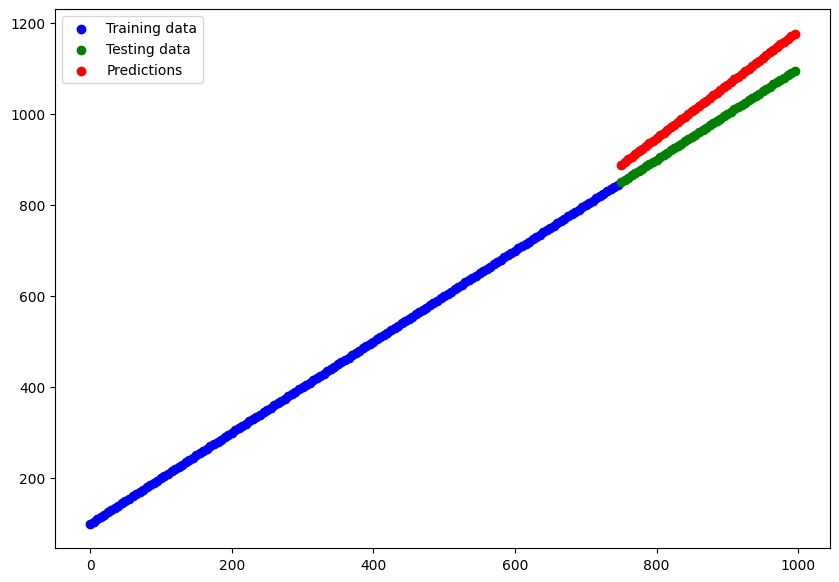

In [24]:
#make prediction with our trained model
y_reg_preds = model_3.predict(X_reg_test)

#plot the model's predctions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Testing data")
plt.scatter(X_reg_test, y_reg_preds.squeeze(), c="r", label="Predictions")
plt.legend();


## the missing peice - Non linearity

Okay, so we saw our neural network can model straight lines (with ability a little bit better than guessing).

What about non-straight (non-linear) lines?

If we're going to model our classification data (the red and blue circles), we're going to need some non-linear lines.


In [25]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.linear), #hidden layer
  tf.keras.layers.Dense(1) #output layer
])

model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

model_4.fit(X, y, epochs=100) #fit the model

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 6.6819 - accuracy: 0.4920
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 6.6430 - accuracy: 0.4950
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 6.6191 - accuracy: 0.4930
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 6.6039 - accuracy: 0.4930
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 6.5797 - accuracy: 0.4930
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 6.5503 - accuracy: 0.4920
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 6.5452 - accuracy: 0.4920
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 6.5228 - accuracy: 0.4920
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 6.4696 - accuracy: 0.4920
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 6.4321 - accuracy: 0.4910
Epoch 11/

okay our model performs little worse than gussing

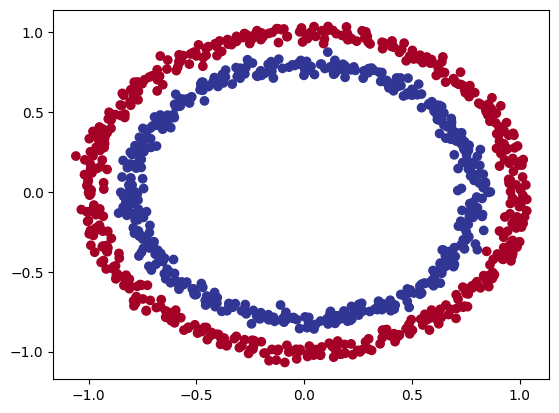

In [26]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

313/313 [==============================] - 1s 1ms/step
doing binary classifcation...


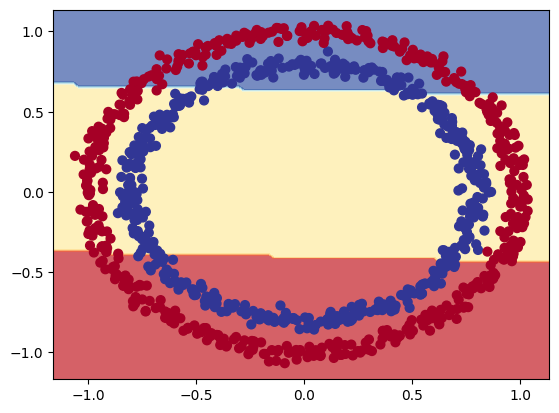

In [27]:
plot_decision_boundary(model_4, X, y)

In [28]:
# Set random seed
tf.random.set_seed(42)

# Create a model with a non-linear activation
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.relu), # can also do activation='relu'
  tf.keras.layers.Dense(1) # output layer
])

# Compile the model
model_5.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 4ms/step - loss: 1.9440 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 1.5009 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 1.3836 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 1.3025 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 1.2399 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 1.1899 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 1.1503 - accuracy: 0.4990
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 1.1175 - accuracy: 0.4740
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 1.0908 - accuracy: 0.4350
Epoch 10/100
32/32 [==============================] - 0s 5ms/step - loss: 1.0674 - accuracy: 0.4160
Epoch 11/

still same lets inrease more layer with relu aactivation

In [29]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1)
])

model_6.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history = model_6.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 4.2531 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7199 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 3.2777 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 2.7135 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 2.1395 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 1.5487 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0060 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.9470 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.9090 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 0.8741 - accuracy: 0.5000
Epoch 11/

In [30]:
#evaluate the model
model_6.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6226 - accuracy: 0.6370


[0.6225643754005432, 0.6370000243186951]

we are stil hitting 50% accuracy

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


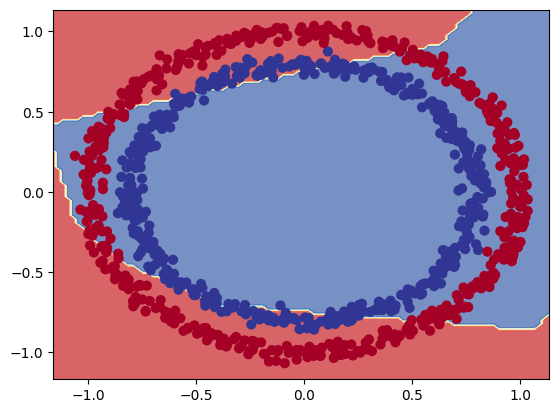

In [31]:
plot_decision_boundary(model_6, X, y)

In [32]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, ReLU activation
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) # ouput layer, sigmoid activation
])

# Compile the model
model_7.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history = model_7.fit(X, y, epochs=100, verbose=0)

In [33]:
model_7.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.3105 - accuracy: 0.9760


[0.31045812368392944, 0.9760000109672546]

313/313 [==============================] - 1s 1ms/step
doing binary classifcation...


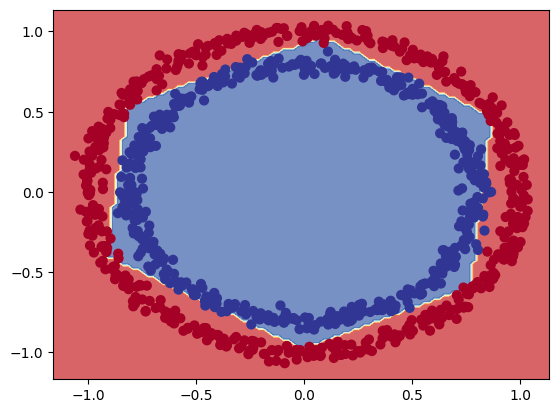

In [34]:
plot_decision_boundary(model_7, X, y)


In [35]:
#create a toy tensor
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

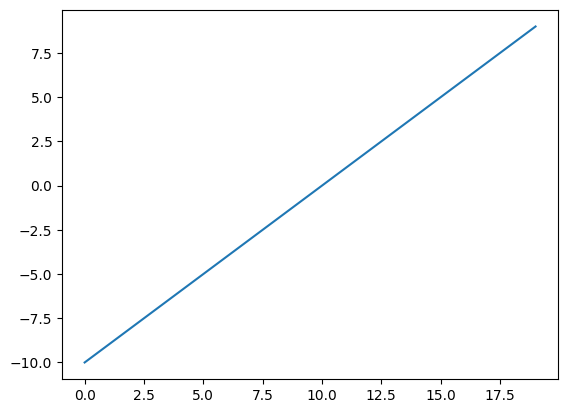

In [36]:
#visulize
plt.plot(A);


In [37]:
#now lets create a sigmoid function
def sigmoid(x):
  return 1/(1 + tf.exp(-x))

sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

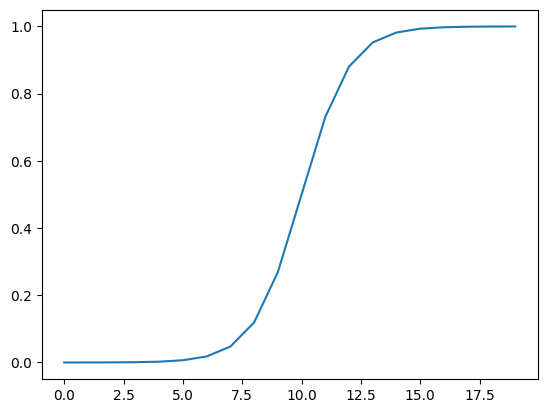

In [38]:
plt.plot(sigmoid(A))

In [39]:
#how about relu fucntion ?
def relu(x):
  return tf.maximum(0, x)

relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

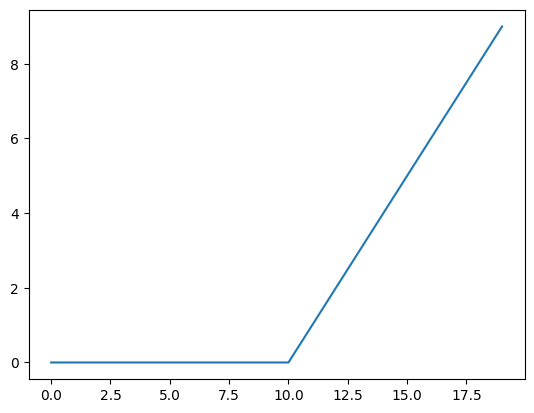

In [40]:
plt.plot(relu(A))

how about linear activation fucntion?

In [41]:
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

In [42]:
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

nothing changes using linear funtion

Evaluating and improving the classification model.

In [43]:
len(X)

1000

In [44]:
#split data in to train and test data
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

#check the shapes of the data
X_train.shape, X_test.shape,

((800, 2), (200, 2))

In [45]:
# Set random seed
tf.random.set_seed(42)

# Create the model (same as model_7)
model_8 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"), # hidden layer 1, using "relu" for activation (same as tf.keras.activations.relu)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid") # output layer, using 'sigmoid' for the output
])

# Compile the model
model_8.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), # increase learning rate from 0.001 to 0.01 for faster learning
                metrics=['accuracy'])

# Fit the model
history = model_8.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 2ms/step - loss: 0.7254 - accuracy: 0.4487
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.7008 - accuracy: 0.4850
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6912 - accuracy: 0.5000
Epoch 4/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6829 - accuracy: 0.5888
Epoch 5/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6722 - accuracy: 0.5950
Epoch 6/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6595 - accuracy: 0.5913
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6425 - accuracy: 0.7100
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6191 - accuracy: 0.7275
Epoch 9/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5786 - accuracy: 0.7900
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5203 - accuracy: 0.8900
Epoch 11/25
25/25 [

In [46]:
#evaluate our model
loss, accuracy = model_8.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy * 100):.2f}%")

7/7 [==============================] - 0s 3ms/step - loss: 0.0795 - accuracy: 0.9950
Model loss on the test set: 0.07951078563928604
Model accuracy on the test set: 99.50%


313/313 [==============================] - 1s 2ms/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


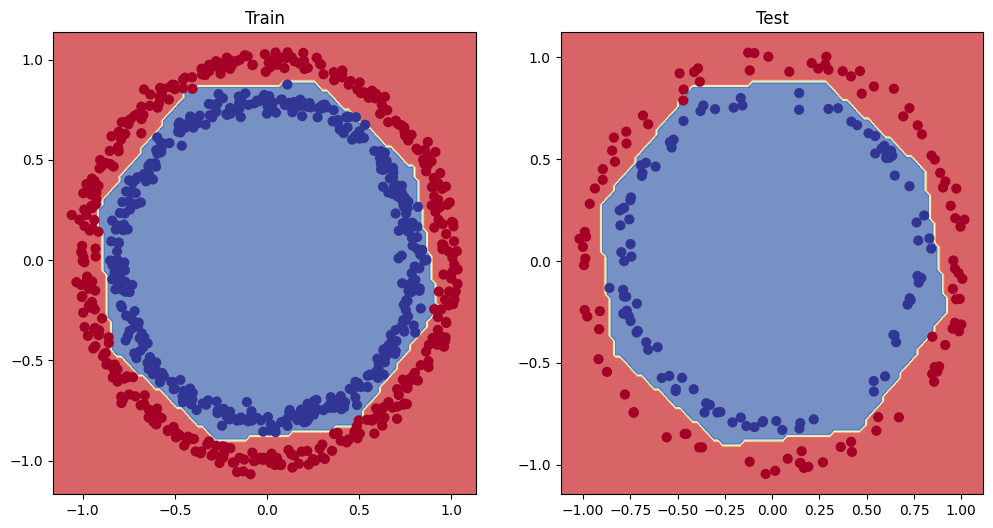

In [47]:
#plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show()

In [48]:
##plot the loss curves
pd.DataFrame(history.history)

,loss,accuracy
0,0.725394,0.44875
1,0.700798,0.48500
2,0.691190,0.50000
3,0.682883,0.58875
4,0.672199,0.59500
5,0.659481,0.59125
6,0.642459,0.71000
7,0.619064,0.72750
8,0.578553,0.79000
9,0.520318,0.89000


Text(0.5, 1.0, 'Model_8 loss curves')

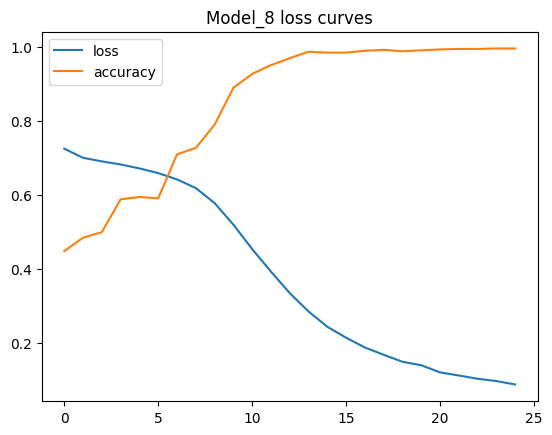

In [49]:
#visualize
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves")

In [50]:
# Set random seed
tf.random.set_seed(42)

# Create the model (same as model_7)
model_8 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"), # hidden layer 1, using "relu" for activation (same as tf.keras.activations.relu)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid") # output layer, using 'sigmoid' for the output
])

# Compile the model
model_8.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), # increase learning rate from 0.001 to 0.01 for faster learning
                metrics=['accuracy'])

# Fit the model
history = model_8.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 4ms/step - loss: 0.7235 - accuracy: 0.4663
Epoch 2/25
25/25 [==============================] - 0s 4ms/step - loss: 0.7000 - accuracy: 0.4538
Epoch 3/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6910 - accuracy: 0.4988
Epoch 4/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6879 - accuracy: 0.5387
Epoch 5/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6857 - accuracy: 0.5213
Epoch 6/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6830 - accuracy: 0.5325
Epoch 7/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6797 - accuracy: 0.5387
Epoch 8/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6779 - accuracy: 0.5400
Epoch 9/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6757 - accuracy: 0.5475
Epoch 10/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6718 - accuracy: 0.5450
Epoch 11/25
25/25 [

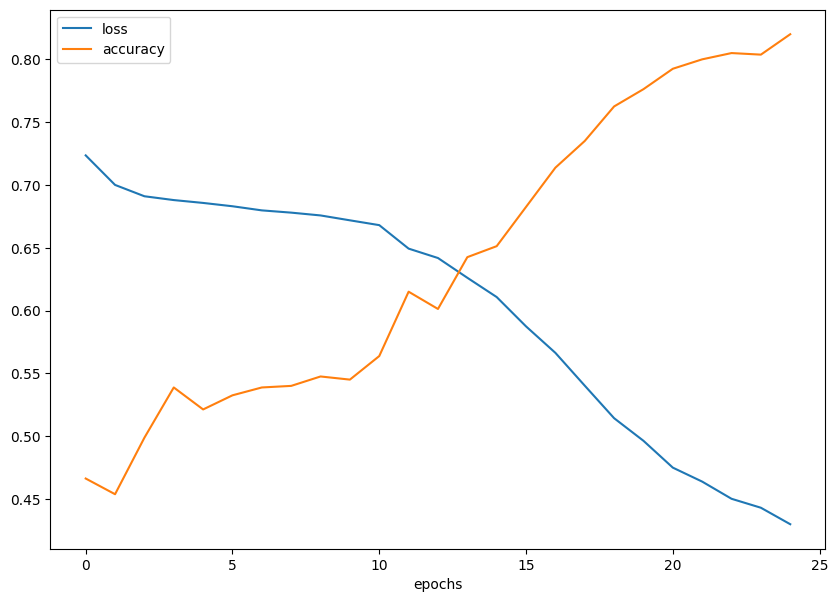

In [51]:
# Checkout the history
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel="epochs");

ValueError: x and y must have same first dimension, but have shapes (100,) and (25,)

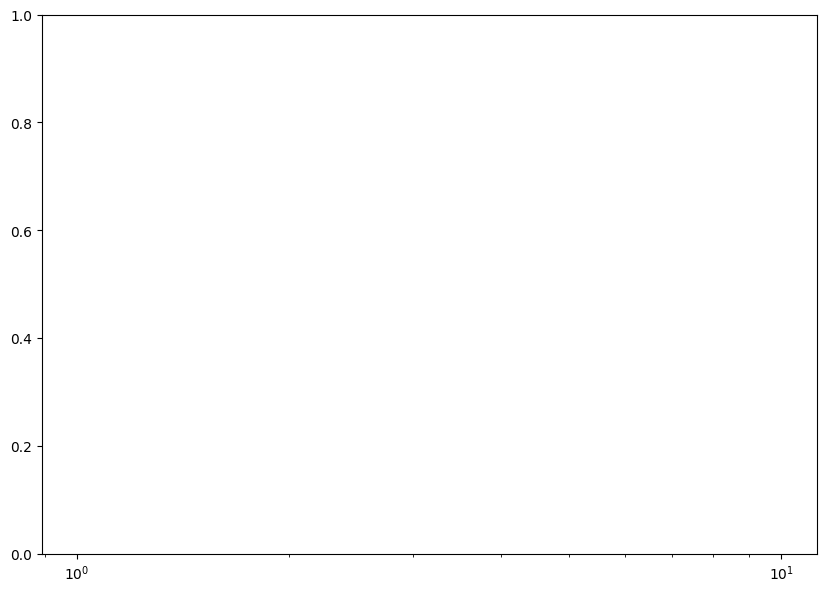

In [52]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

i didn't understood the error here so i am moving to aother model.

##working with larger example

In [53]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [54]:
#show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [56]:
# Check the shape of our data
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [57]:
#check shape of one example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

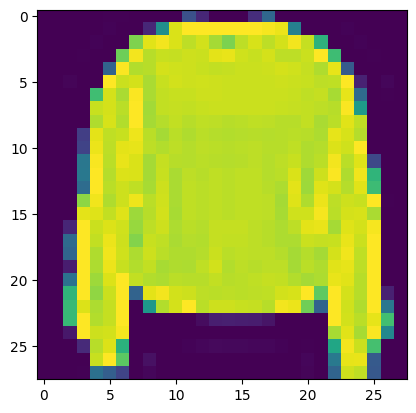

In [61]:
#plot a single example
import matplotlib.pyplot as plt
plt.imshow(train_data[7])

In [62]:
#check our samples label
train_labels[7]

2

In [63]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# How many classes are there (this'll be our output shape)?
len(class_names)

10

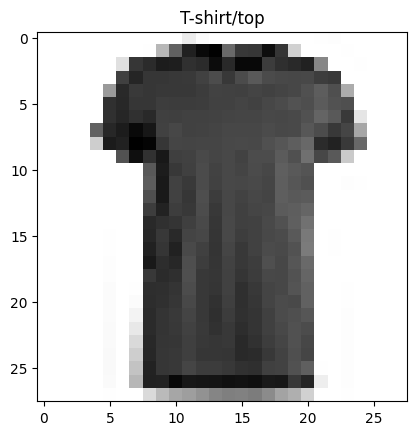

In [64]:
#plot an example image and its label
plt.imshow(train_data[17], cmap=plt.cm.binary) # change the colours to black & white
plt.title(class_names[train_labels[17]]);

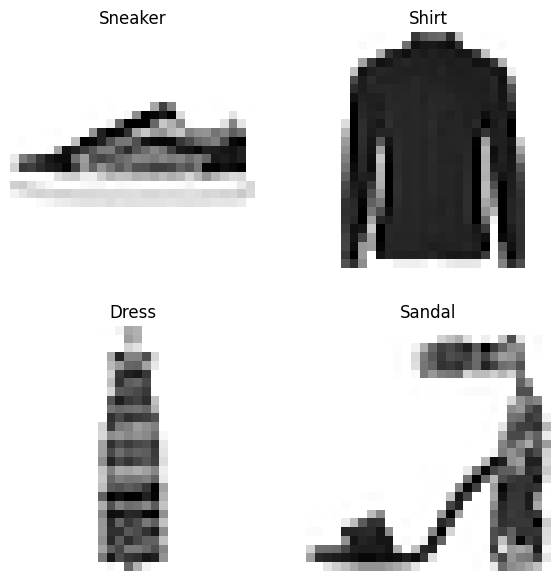

In [66]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

In [69]:
tf.random.set_seed(42)

model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

#fit the model
non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels))



Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.4274 - accuracy: 0.0993 - val_loss: 2.3024 - val_accuracy: 0.1001
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0985 - val_loss: 2.3025 - val_accuracy: 0.1001
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 2.3027 - accuracy: 0.1002 - val_loss: 2.3025 - val_accuracy: 0.1001
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3024 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 7s 3ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3024 - val_accuracy: 0.1001
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3024 - val_accuracy: 0.1001
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3024 - val_accuracy

In [70]:
model_11.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_34 (Dense)            (None, 4)                 3140      
                                                                 
 dense_35 (Dense)            (None, 4)                 20        
                                                                 
 dense_36 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [72]:
#divide train and test data images by the mazimum values to normalize it
train_data = train_data / 255.0
test_data = test_data / 255.0

train_data.min(), train_data.max()

(0.0, 1.0)

In [73]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model (to the normalized data)
norm_history = model_12.fit(train_data,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 16s 7ms/step - loss: 1.0775 - accuracy: 0.5895 - val_loss: 0.8055 - val_accuracy: 0.7107
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7503 - accuracy: 0.7371 - val_loss: 0.7469 - val_accuracy: 0.7369
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6865 - accuracy: 0.7652 - val_loss: 0.6832 - val_accuracy: 0.7681
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6467 - accuracy: 0.7788 - val_loss: 0.6538 - val_accuracy: 0.7806
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6213 - accuracy: 0.7848 - val_loss: 0.6481 - val_accuracy: 0.7769
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6028 - accuracy: 0.7909 - val_loss: 0.6412 - val_accuracy: 0.7836
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5922 - accuracy: 0.7942 - val_loss: 0.6317 - val_accuracy

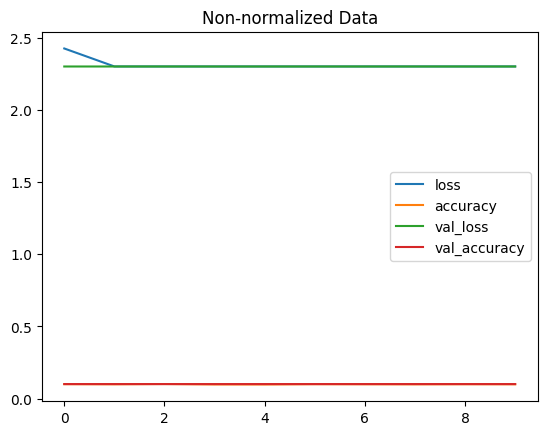

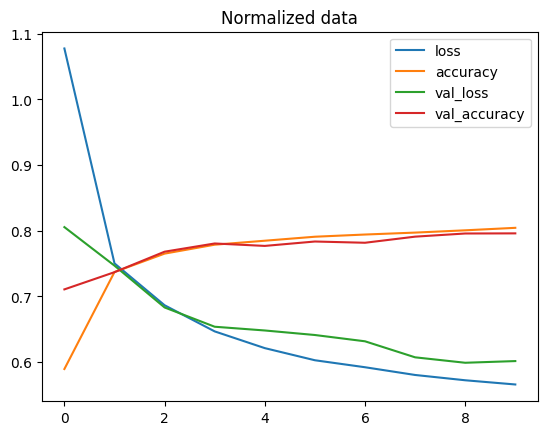

In [74]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized Data")
# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data");

In [76]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_13 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data,
                               train_labels,
                               epochs=40, # model already doing pretty good with current LR, probably don't need 100 epochs
                               validation_data=(test_data, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 7s 3ms/step - loss: 2.3028 - accuracy: 0.0991 - val_loss: 2.3026 - val_accuracy: 0.1000 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3027 - val_accuracy: 0.1000 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0997 - val_loss: 2.3027 - val_accuracy: 0.1000 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3028 - accuracy: 0.0976 - val_loss: 2.3027 - val_accuracy: 0.1000 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0985 - val_loss: 2.3026 - val_accuracy: 0.1000 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3029 - accuracy: 0.1000 - val_loss: 2.3027 - val_accuracy: 0.1000 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 6s

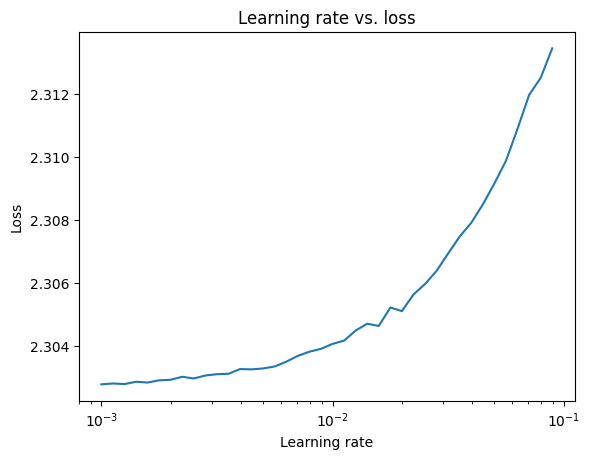

In [77]:
#plot the learnig rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10 ** (np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

In [78]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_14 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # ideal learning rate (same as default)
                 metrics=["accuracy"])

# Fit the model
history = model_14.fit(train_data,
                       train_labels,
                       epochs=20,
                       validation_data=(test_data, test_labels))

Epoch 1/20
1875/1875 [==============================] - 10s 4ms/step - loss: 1.4605 - accuracy: 0.4123 - val_loss: 1.0831 - val_accuracy: 0.5721
Epoch 2/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.9715 - accuracy: 0.6016 - val_loss: 0.9061 - val_accuracy: 0.6199
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8638 - accuracy: 0.6407 - val_loss: 0.8526 - val_accuracy: 0.6598
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8180 - accuracy: 0.6729 - val_loss: 0.8421 - val_accuracy: 0.6947
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7193 - accuracy: 0.7355 - val_loss: 0.6808 - val_accuracy: 0.7600
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6367 - accuracy: 0.7710 - val_loss: 0.6606 - val_accuracy: 0.7609
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6144 - accuracy: 0.7792 - val_loss: 0.6333 - val_accurac

In [79]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [80]:
#make predictions with the most recent model
y_probs = model_14.predict(test_data)

# View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 2s 5ms/step


array([[8.5334957e-09, 3.7613308e-11, 1.3563394e-11, 2.0208004e-08,
        5.6844977e-14, 1.7550901e-01, 7.3670644e-12, 3.9878745e-02,
        1.4261402e-04, 7.8446960e-01],
       [6.9245528e-03, 3.0375511e-05, 7.3352200e-01, 1.1109687e-02,
        1.5899853e-01, 3.2718882e-03, 8.5780308e-02, 2.4598228e-05,
        2.2892292e-04, 1.0913530e-04],
       [1.3158727e-04, 9.9852127e-01, 2.7095711e-11, 1.3469486e-03,
        4.3753601e-11, 4.2307195e-14, 3.4767886e-08, 3.6107710e-21,
        2.2366650e-10, 6.9203776e-17],
       [1.2364186e-04, 9.9294096e-01, 1.6868613e-10, 6.9353362e-03,
        5.5252591e-10, 4.6250156e-13, 6.8977144e-08, 5.7238515e-19,
        8.1412316e-10, 6.2893329e-16],
       [2.6096562e-01, 7.2900206e-04, 1.3844231e-01, 7.6981778e-03,
        1.4324594e-02, 2.1984793e-04, 5.7678908e-01, 6.9145101e-10,
        8.3056150e-04, 6.3135764e-07]], dtype=float32)

In [81]:
# See the predicted class number and label for the first example
y_probs[0].argmax(), class_names[y_probs[0].argmax()]

(9, 'Ankle boot')

In [82]:
# Convert all of the predictions from probabilities to labels
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 4, 5, 7])

In [83]:
# check out the non-prettfied matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[812,   1,  14,  64,  14,   2,  86,   0,   7,   0],
       [  5, 920,   3,  62,   2,   1,   7,   0,   0,   0],
       [ 22,   0, 743,  12, 175,   0,  48,   0,   0,   0],
       [ 30,   7,   9, 852,  63,   1,  29,   1,   8,   0],
       [  2,   0, 141,  48, 770,   0,  34,   0,   5,   0],
       [  1,   0,   1,   1,   0, 873,   0,  74,   7,  43],
       [174,   0, 142,  51, 388,   0, 229,   0,  16,   0],
       [  0,   0,   0,   0,   0,  28,   0, 919,   0,  53],
       [  5,   0,   2,   6,  36,  25,  32,   4, 890,   0],
       [  0,   0,   1,   0,   0,  18,   0,  30,   1, 950]])

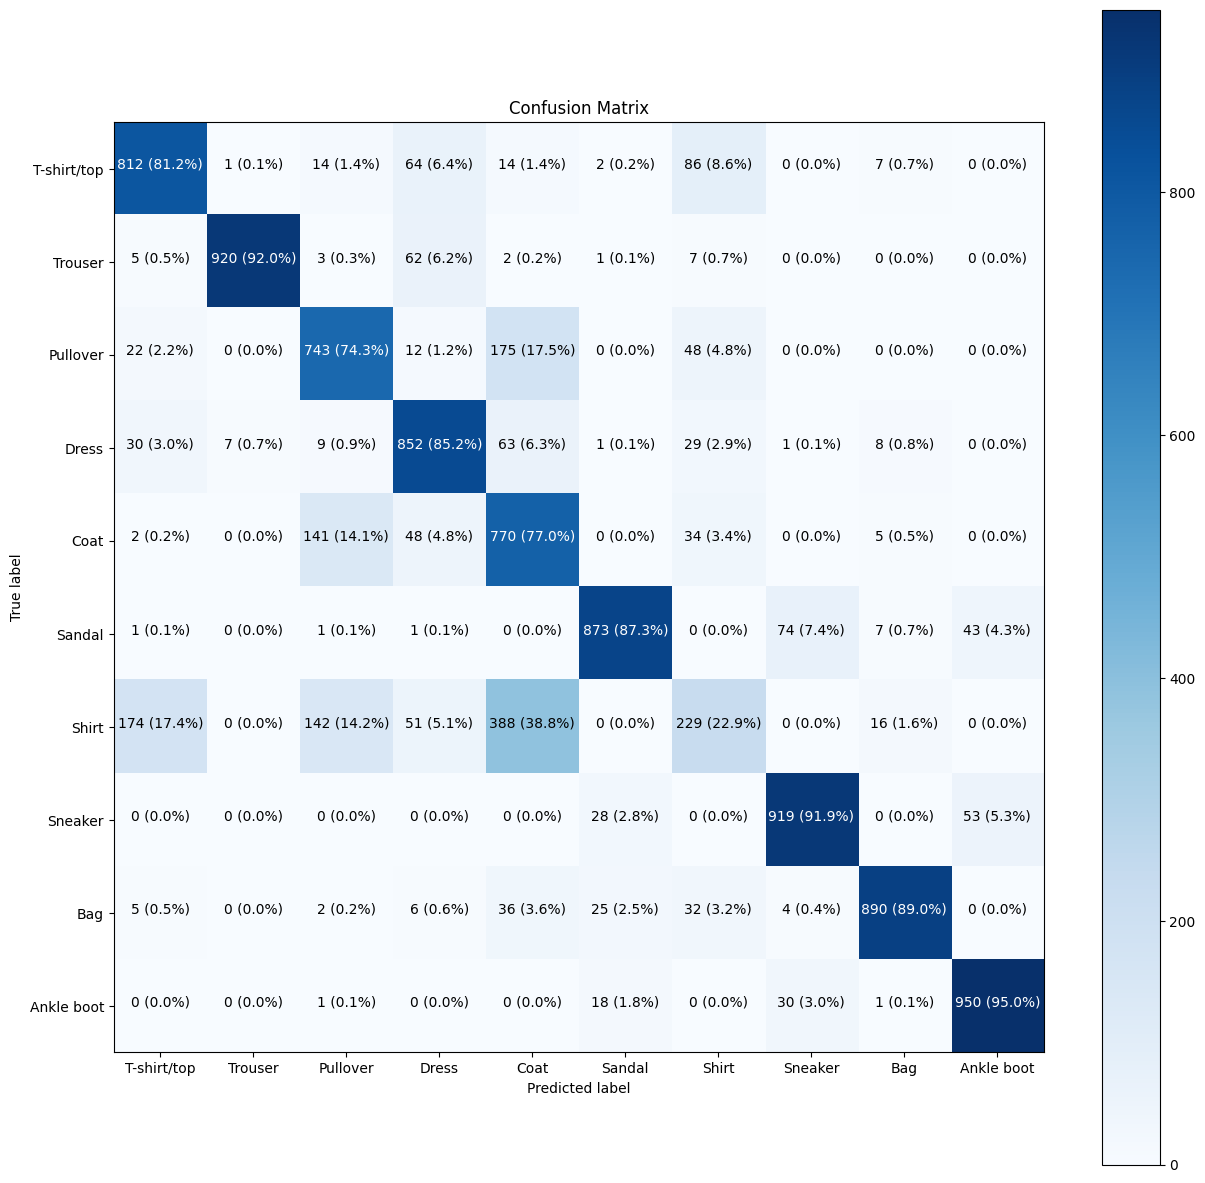

In [84]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

In [85]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.

  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """
  # Setup random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

1/1 [==============================] - 0s 25ms/step


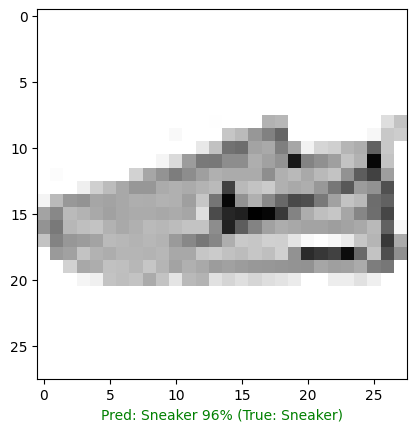

In [89]:
# Check out a random image as well as its prediction
plot_random_image(model=model_14,
                  images=test_data,
                  true_labels=test_labels,
                  classes=class_names)